In [2]:
import rdflib

g = rdflib.Graph()
g.parse("graph_stardog.ttl",format="ttl") #load local rdf file

<Graph identifier=N99ba3a883b71465189379579025a77c1 (<class 'rdflib.graph.Graph'>)>

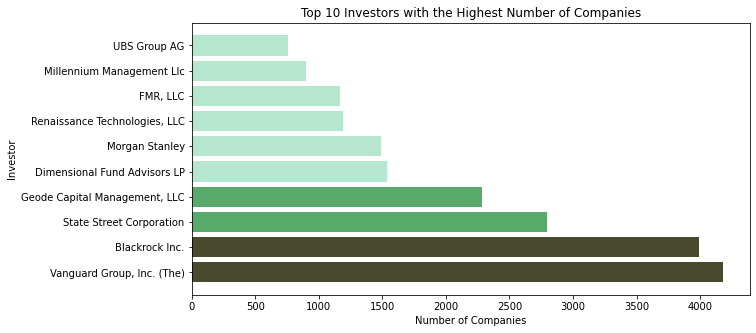

In [6]:
# SPARQL query to get the top 10 investors with the highest number of companies
query = """
PREFIX ns: <http://example.org/>
SELECT ?name (COUNT(DISTINCT ?company) AS ?numCompanies)
WHERE {
  ?investment ns:investor ?investor ;
              ns:shareholderOf ?company .
  ?investor ns:name ?name .
 
}
GROUP BY ?name
ORDER BY DESC(?numCompanies)
LIMIT 10

"""

results = g.query(query)

investors = []
num_companies = []

import matplotlib.pyplot as plt

# Extract the results and store them in two lists: investors and num_companies
for row in results:
    investors.append(str(row[0]))
    num_companies.append(int(row[1]))


# Generate a list of colors based on the num_companies values
colors = ['#B4E7CE' if n < 1600 else '#59A96A' if n < 3000 else '#474A2C' for n in num_companies]

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.barh(investors, num_companies, color=colors)
plt.xlabel("Number of Companies")
plt.ylabel("Investor")
plt.title("Top 10 Investors with the Highest Number of Companies")
plt.show()


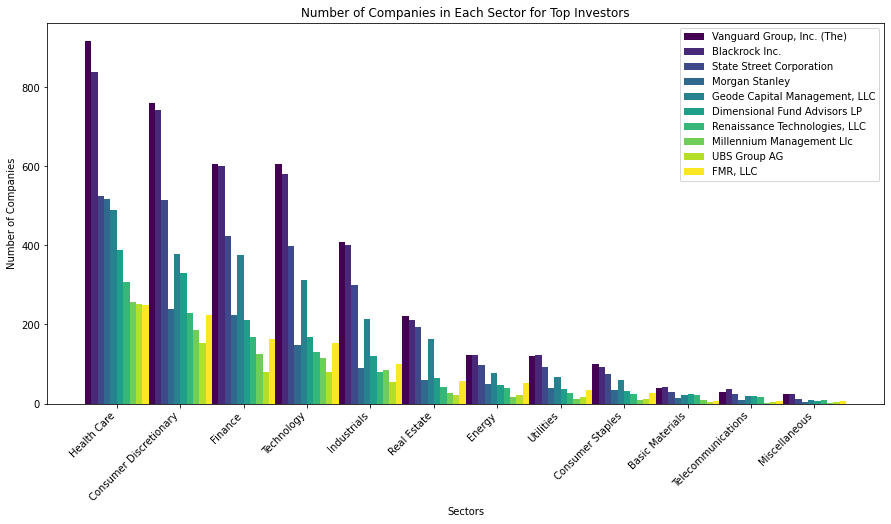

In [11]:
# SPARQL query to get the top 10 investors with the highest number of companies
query = """
PREFIX ns: <http://example.org/>
SELECT DISTINCT ?investor_name ?sector (COUNT(DISTINCT ?company) AS ?numCompany)
WHERE {
  ?investment ns:investor ?investor ;
              ns:shareholderOf ?company .
  ?investor ns:name ?investor_name .
  ?company ns:sector ?sector .
  VALUES (?investor) {
    (<http://example.org/Vanguard%20Group%2C%20Inc.%20%28The%29>)
    (<http://example.org/Blackrock%20Inc.>)
    (<http://example.org/State%20Street%20Corporation>)
    (<http://example.org/Geode%20Capital%20Management%2C%20LLC>)
    (<http://example.org/Dimensional%20Fund%20Advisors%20LP>)
    (<http://example.org/Morgan%20Stanley>)
    (<http://example.org/Renaissance%20Technologies%2C%20LLC>)
    (<http://example.org/FMR%2C%20LLC>)
    (<http://example.org/Millennium%20Management%20Llc>)
    (<http://example.org/UBS%20Group%20AG>)
  }
}
GROUP BY ?investor_name ?sector
ORDER BY DESC(?numCompany)


"""

results = g.query(query)

import matplotlib.pyplot as plt

# Extract the results and store them in a dictionary: investor_data
investor_data = {}
for row in results:
    investor = str(row[0])
    sector = str(row[1])
    num_company = int(row[2])
    if investor not in investor_data:
        investor_data[investor] = {}
    investor_data[investor][sector] = num_company

import numpy as np

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 7))

index = 0
bar_width = 0.1
colormap = plt.cm.viridis

# Generate colors based on the number of investors
colors = colormap(np.linspace(0, 1, len(investor_data)))

for investor, sectors in investor_data.items():
    sector_count = [count for count in sectors.values()]
    sector_labels = [sector for sector in sectors.keys()]
    x = [i + index * bar_width for i, _ in enumerate(sector_labels)]

    ax.bar(x, sector_count, width=bar_width, color=colors[index], label=investor)
    index += 1

ax.set_xticks([i + (bar_width * (len(investor_data) - 1) / 2) for i, _ in enumerate(sector_labels)])
ax.set_xticklabels(sector_labels, rotation=45, ha='right')  # Rotate the x-axis labels

ax.set_xlabel("Sectors")
ax.set_ylabel("Number of Companies")
ax.set_title("Number of Companies in Each Sector for Top Investors")
ax.legend()

plt.show()

